In [8]:
# Title: DMRG Ground State Search and Compression Algorithms
# Author: Aaron Sander
# Date: March-May 2020

# This program is used for initial learning of tensor network methods
# to be used in my bachelor thesis.
# It is an implementation of the Density Matrix Renormalization Group (DMRG)
# for the ground state search of a given Hamiltonian as an MPO as well as
# for compressing an arbitrary quantum state which has relevant applications
# in data compression and graph embedding.

### NOTE: This code is written for learning purposes. It is not meant
###       to be optimized for speed/efficiency, but has readability in mind.

In [9]:
######################### IMPORTS #############################################
from canonical_forms import *
from compression import *
from contractions import *
import ground_state_search as gnd
import initializations as init
from metrics import *
import activation_functions as act


import numpy as np
import math

# Ground State Search
This section looks for the ground state of the Ising Model with given parameters as accurately as a given threshold.

In [10]:
MPO = init.initialize_quantum_ising_MPO(num_sites=3, J=1, g=1)

Initial Energy: 1.2823952436892445
Energy: -2.7974764478733234 BondDim: 1
Energy: -3.0544279382816986 BondDim: 1
Energy: -3.133210389044977 BondDim: 1
Energy: -3.1595371572313296 BondDim: 1
Energy: -3.162155066780228 BondDim: 1
Energy: -3.1622733751066696 BondDim: 1
Energy: -3.4939592074349344 BondDim: 2
Energy: -3.4939592074349335 BondDim: 2
Energy: -3.493959207434934 BondDim: 2


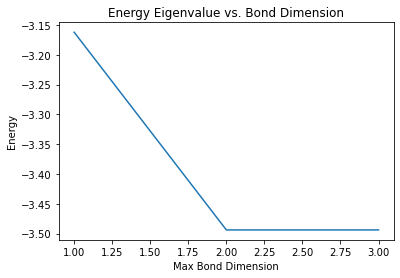

In [11]:
E, V, max_bond_dim = gnd.ground_state_search(MPO, threshold=1e-3, plot=1)

# Compression
This section converts an arbitrary n-bit string into an MPS and compresses it into one with a lower bond dimension.
The metrics used are cosine similarity (0 worst, 1 perfect), loss (1-cosSim), and Euclidean distance (-2 worst, 0 best)

In [12]:
data = init.initialize_random_normed_vector(length=512)

In [13]:
d = 2
raw_state = vector_to_left_canonical_MPS(data, phys_dim=d, num_sites=int(math.log(len(data), d)))

Sim: 0.7655255129942117 Dist: 0.48422565711224735 BondDim: 1
Sim: 0.7886258015865764 Dist: 0.4597544979806331 BondDim: 2
Sim: 0.8090561082092005 Dist: 0.43697127112751916 BondDim: 3
Sim: 0.8346689963338357 Dist: 0.40660915344611404 BondDim: 4
Sim: 0.8599016817288693 Dist: 0.3742970989349669 BondDim: 5
Sim: 0.8819814103809862 Dist: 0.3435383379173495 BondDim: 6
Sim: 0.9023411046807792 Dist: 0.3125042324820924 BondDim: 7
Sim: 0.9228068616595113 Dist: 0.27783653168812616 BondDim: 8
Sim: 0.9397476768184132 Dist: 0.24546348645284521 BondDim: 9
Sim: 0.9510323326379962 Dist: 0.2212863921754001 BondDim: 10
Sim: 0.9634753804955104 Dist: 0.19111415307215604 BondDim: 11
Sim: 0.9735435994508103 Dist: 0.16265423618580327 BondDim: 12
Sim: 0.9829988638102256 Dist: 0.13038840512014502 BondDim: 13
Sim: 0.989654168991036 Dist: 0.10171445821005062 BondDim: 14
Sim: 0.9950947874516944 Dist: 0.07003722259134226 BondDim: 15


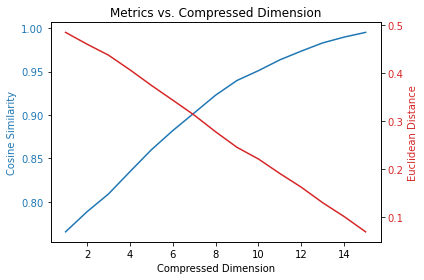

In [14]:
compressions, dist, sim = compress(raw_state, threshold=1e-3, plot=1)